In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/test.csv")
tr = pd.read_csv("data/train.csv")

In [4]:
import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
extrastopwords = ["http", "https"]

In [6]:
allstopwords = stopwords.words('english') + extrastopwords

In [7]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['stopWord1','stopWord2']
stopwords.extend(newStopWords)

In [8]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    alpha_list = []
    for i in text:
        if i.isalnum():
            alpha_list.append(i)
    text = alpha_list[:]#copying list
    no_stopwords = []
    for i in text:
        if i not in allstopwords and i not in string.punctuation:
            no_stopwords.append(i)
    text = no_stopwords[:]
#    for i in text:
#        y.append(ps.stem(i))
    return " ".join(text)

In [9]:
tr['transform_text'] = tr['text'].apply(transform)

In [10]:
disaster_tweets = tr[tr['target'] == 1]

In [11]:
listofwords = []

for a in tr['transform_text']:
    listofwords.append(a)

fullist = " ".join(listofwords)
fullistwords = fullist.split()

#from nltk.util import ngrams
#text = "I am batman and I like coffee"
#_1gram = text.split(" ")
#_2gram = [' '.join(e) for e in ngrams(_1gram, 2)]
#_3gram = [' '.join(e) for e in ngrams(_1gram, 3)]


In [12]:
disasterwords = []

for a in disaster_tweets['transform_text']:
    disasterwords.append(a)

disfullist = " ".join(disasterwords)
disfullistwords = disfullist.split()

In [13]:
from nltk.probability import FreqDist
disfulllistdist = FreqDist(disfullistwords)
print(disfulllistdist)


<FreqDist with 8413 samples and 30804 outcomes>


In [14]:
len(disfullistwords)

30804

In [15]:
for a in disfulllistdist.most_common(40):
    print(a[0],a[1]/30804)



fire 0.005746007012076354
news 0.004544864303337229
amp 0.004382547721075185
via 0.003928061290741462
disaster 0.003863134657836645
california 0.0036034281262173743
police 0.003473574860407739
people 0.0033761849110505128
suicide 0.0033761849110505128
killed 0.0030190884300740164
like 0.0030190884300740164
storm 0.0028243085313595638
hiroshima 0.0028243085313595638
crash 0.0027593818984547464
fires 0.0027269185820023374
families 0.002629528632645111
train 0.0025646019997402933
2 0.002467212050383067
buildings 0.0024347487339306585
emergency 0.0024022854174782496
bomb 0.0024022854174782496
two 0.002337358784573432
mh370 0.0023048954681210232
nuclear 0.0022724321516686143
attack 0.002239968835216206
video 0.002239968835216206
wildfire 0.002239968835216206
accident 0.002207505518763797
get 0.0021425788858589795
bombing 0.0021425788858589795
one 0.0021101155694065706
northern 0.0020776522529541617
burning 0.0020776522529541617
dead 0.002045188936501753
legionnaires 0.0019477989871445266
bo

In [16]:
disfulllistdist.most_common(40)


[('fire', 177),
 ('news', 140),
 ('amp', 135),
 ('via', 121),
 ('disaster', 119),
 ('california', 111),
 ('police', 107),
 ('people', 104),
 ('suicide', 104),
 ('killed', 93),
 ('like', 93),
 ('storm', 87),
 ('hiroshima', 87),
 ('crash', 85),
 ('fires', 84),
 ('families', 81),
 ('train', 79),
 ('2', 76),
 ('buildings', 75),
 ('emergency', 74),
 ('bomb', 74),
 ('two', 72),
 ('mh370', 71),
 ('nuclear', 70),
 ('attack', 69),
 ('video', 69),
 ('wildfire', 69),
 ('accident', 68),
 ('get', 66),
 ('bombing', 66),
 ('one', 65),
 ('northern', 64),
 ('burning', 64),
 ('dead', 63),
 ('legionnaires', 60),
 ('bomber', 60),
 ('pm', 59),
 ('homes', 58),
 ('still', 57),
 ('war', 57)]

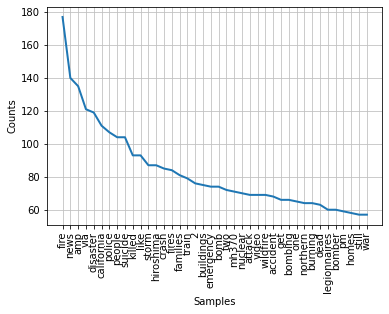

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
import matplotlib.pyplot as plt
disfulllistdist.plot(40,cumulative=False)
